In [113]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib

import matplotlib.pyplot as plt

%matplotlib inline 

# Loading data

In [133]:
def readData(path):
    data = pandas.read_csv(path, sep=';', header=None)
    
    labels = data[[0]].stack().unique()

    num = data[0].value_counts().min()
    subsets = []
    
    print "examples per class: " + str(num)

    for l in labels:
        subsets.append( data[data[0] == l].sample(n=num) )

    dataPrepared = pd.concat(subsets)
    
    dataPrepared.to_csv('1.csv')
    
    Y = dataPrepared[[0]].values
    X = dataPrepared[range(1,43)].values
    
    return X, Y
    

In [134]:
inputTrainPath = "/home/adeykin/projects/LeapRecorder/features6.csv"
X_train, Y_train = readData(inputTrainPath)

examples per class: 382


In [135]:
inputTestPath = "/home/adeykin/projects/LeapRecorder/features7.csv"
X_test, Y_test = readData(inputTestPath)

examples per class: 161


# Train

In [136]:
#X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.30, random_state=42)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [144]:
for i in range(1,4):            
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier = classifier.fit(X_train, Y_train)    
    print "KNN learning succesfull finished " + str(i)
    #Y_train_actual = classifier.predict(X_train)
    Y_test_actual  = classifier.predict(X_test)

    print sklearn.metrics.classification_report(Y_test, Y_test_actual)
    #sklearn.metrics.average_precision_score(Y_test, Y_test_actual)
        

KNN learning succesfull finished 1
             precision    recall  f1-score   support

          1       0.41      0.85      0.55       161
          3       0.78      0.65      0.71       161
          4       0.77      1.00      0.87       161
          6       1.00      0.69      0.82       161
          9       0.55      0.81      0.66       161
         12       1.00      0.83      0.91       161
         13       0.77      0.86      0.81       161
         14       0.99      0.79      0.88       161
         15       1.00      1.00      1.00       161
         16       0.77      0.85      0.81       161
         17       0.60      0.32      0.41       161
         18       1.00      1.00      1.00       161
         19       0.67      0.65      0.66       161
         20       0.96      1.00      0.98       161
         21       0.82      1.00      0.90       161
         22       0.78      0.30      0.44       161
         25       1.00      1.00      1.00       161
         2

In [143]:
classifier = GaussianNB()
classifier = classifier.fit(X_train, Y_train)    
print "Gauss learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

Gauss learning succesfull finished 
             precision    recall  f1-score   support

          1       0.99      0.83      0.90       161
          3       1.00      0.35      0.52       161
          4       0.99      1.00      1.00       161
          6       0.00      0.00      0.00       161
          9       1.00      0.29      0.44       161
         12       0.00      0.00      0.00       161
         13       0.30      0.47      0.36       161
         14       1.00      0.99      1.00       161
         15       1.00      1.00      1.00       161
         16       0.41      0.70      0.52       161
         17       0.04      0.02      0.03       161
         18       1.00      1.00      1.00       161
         19       0.13      0.08      0.10       161
         20       1.00      1.00      1.00       161
         21       1.00      0.53      0.70       161
         22       0.29      0.35      0.32       161
         25       1.00      1.00      1.00       161
         

In [137]:
classifier = svm.SVC()
classifier = classifier.fit(X_train, Y_train)    
print "SVC learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

SVC learning succesfull finished 
             precision    recall  f1-score   support

          1       1.00      0.73      0.85       161
          3       0.90      0.52      0.66       161
          4       1.00      1.00      1.00       161
          6       0.00      0.00      0.00       161
          9       0.54      0.76      0.63       161
         12       1.00      0.02      0.04       161
         13       0.83      1.00      0.91       161
         14       1.00      0.76      0.86       161
         15       0.30      1.00      0.47       161
         16       0.47      0.87      0.61       161
         17       0.27      0.33      0.30       161
         18       1.00      0.98      0.99       161
         19       0.93      0.61      0.74       161
         20       1.00      1.00      1.00       161
         21       1.00      0.75      0.85       161
         22       0.68      0.26      0.38       161
         25       1.00      1.00      1.00       161
         28

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [138]:
classifier = svm.NuSVC()
classifier = classifier.fit(X_train, Y_train)    
print "NuSVC learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

NuSVC learning succesfull finished 
             precision    recall  f1-score   support

          1       1.00      0.69      0.82       161
          3       0.56      0.50      0.53       161
          4       1.00      1.00      1.00       161
          6       0.00      0.00      0.00       161
          9       0.39      0.41      0.40       161
         12       1.00      0.85      0.92       161
         13       0.36      0.11      0.17       161
         14       0.82      0.20      0.33       161
         15       0.14      1.00      0.25       161
         16       0.80      0.60      0.69       161
         17       0.16      0.18      0.17       161
         18       1.00      1.00      1.00       161
         19       0.27      0.08      0.12       161
         20       0.99      1.00      0.99       161
         21       1.00      0.43      0.61       161
         22       0.60      0.30      0.40       161
         25       1.00      1.00      1.00       161
         

Linear SVC learning succesfull finished 
             precision    recall  f1-score   support

          1       0.59      0.92      0.72       161
          3       0.59      0.48      0.53       161
          4       1.00      0.94      0.97       161
          6       1.00      0.68      0.81       161
          9       0.48      0.84      0.61       161
         12       0.12      0.08      0.10       161
         13       0.85      0.66      0.75       161
         14       0.91      0.85      0.88       161
         15       1.00      0.86      0.92       161
         16       0.41      0.84      0.55       161
         17       0.18      0.04      0.06       161
         18       1.00      0.98      0.99       161
         19       0.48      0.61      0.54       161
         20       1.00      1.00      1.00       161
         21       0.76      0.96      0.85       161
         22       1.00      0.02      0.05       161
         25       0.80      1.00      0.89       161
    

([<matplotlib.axis.YTick at 0x7fcbeccfb610>,
 <a list of 20 Text yticklabel objects>)

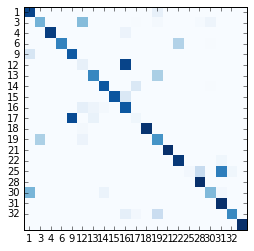

In [142]:
classifier = svm.LinearSVC()
classifier = classifier.fit(X_train, Y_train)    
print "Linear SVC learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)

cm = sklearn.metrics.confusion_matrix(Y_test, Y_test_actual)

#normalization
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

classes = [1,3,4,6,9,12,13,14,15,16,17,18,19,21,22,25,28,30,31,32]
tick_marks = np.arange(len(classes))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

In [140]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)    
print "Linear SVC learning succesfull finished "
#Y_train_actual = classifier.predict(X_train)
Y_test_actual  = classifier.predict(X_test)

print sklearn.metrics.classification_report(Y_test, Y_test_actual)



Linear SVC learning succesfull finished 
             precision    recall  f1-score   support

          1       0.53      0.82      0.65       161
          3       1.00      0.81      0.90       161
          4       0.88      1.00      0.94       161
          6       1.00      0.04      0.07       161
          9       0.96      0.57      0.72       161
         12       0.00      0.00      0.00       161
         13       0.52      1.00      0.69       161
         14       0.52      1.00      0.69       161
         15       1.00      1.00      1.00       161
         16       0.46      0.86      0.60       161
         17       0.64      1.00      0.78       161
         18       0.88      1.00      0.94       161
         19       1.00      0.08      0.15       161
         20       1.00      0.56      0.72       161
         21       1.00      0.66      0.80       161
         22       0.06      0.04      0.05       161
         25       0.98      1.00      0.99       161
    